In [3]:
import numpy as np
import pandas as pd

In [4]:

data = pd.read_csv("archive/bodyPerformance.csv")

In [5]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [46]:
data.shape

(13393, 10)

In [6]:
data.drop(columns=["gender","class"],inplace = True)

In [7]:
data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [31]:
def data_normalize(scaled_data):
    for col in scaled_data.columns:
        scaled_data[col] =(scaled_data[col] - scaled_data[col].mean())/scaled_data[col].std()
        return scaled_data

In [32]:
scaled_data = data_normalisation(data)

In [33]:
scaled_data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717405,0.443856,0.652126,-0.267357,0.112005,-0.015959,1.688127,0.377303,1.416909,0.673983
1,-0.864187,-0.422450,-0.974698,-1.039042,-0.167272,-0.287810,-0.053071,0.128979,0.926599,0.974977
2,-0.423841,1.310163,0.883094,-0.432718,1.229112,1.479221,0.737527,-0.379495,0.646422,-0.228996
3,-0.350450,0.704935,0.305672,-0.666979,-0.260364,1.139407,0.417523,-0.001096,0.926599,0.724149
4,-0.644014,0.621865,0.021146,-0.846121,-0.818918,-0.219847,0.615172,1.406076,0.366245,0.673983


In [34]:
cov_matrix_withfn = np.cov(scaled_data,rowvar=False,bias=False)

In [35]:
cov_matrix_withfn.shape

(10, 10)

In [36]:
from numpy.linalg import eig

In [37]:
w,v = eig(cov_matrix_withfn) # eigen values and eigen vectors

In [38]:
w

array([4.18105838, 2.05387768, 1.21270625, 0.78932876, 0.65120014,
       0.09975181, 0.17426702, 0.21446084, 0.30454491, 0.31880421])

In [80]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=5)
pca_features = pca.fit_transform(scaled_data)

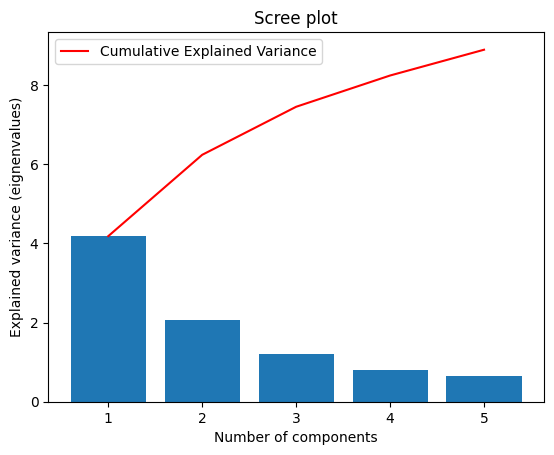

In [81]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
 
plt.show()

Text(0.5, 0, 'Magnitude of the eigenvalue')

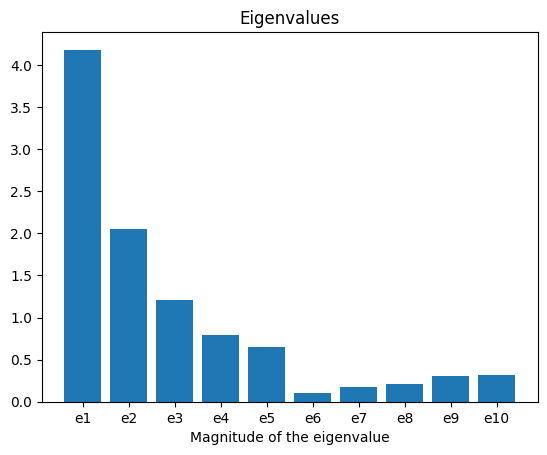

In [82]:
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [83]:
def covariance_calculation(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()
        
    return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted) - 1)

In [84]:
cov_calc = covariance_calculation(scaled_data)

In [85]:
cov_calc.shape

(10, 10)

In [86]:
w_e,v_e = eig(cov_calc)

Text(0.5, 0, 'Magnitude of the eigenvalue')

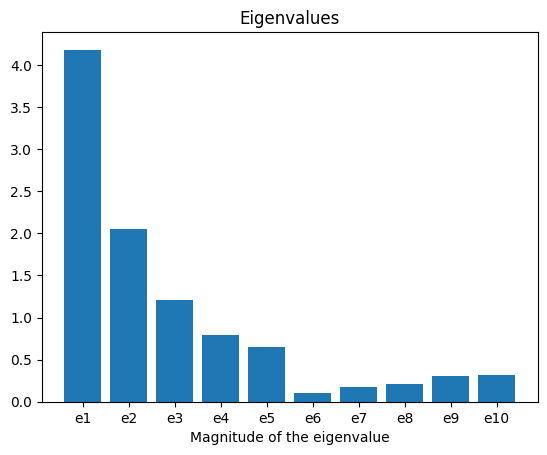

In [87]:
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [88]:
my_pc = v[:,:5] # Keep only first 5 eigenvectors

In [89]:
principle_data = np.dot(data.values,my_pc)

In [90]:
print(principle_data)

[[ 2.19871193 -0.46429554  0.2580907  -0.35626241 -0.52692618]
 [ 0.70774199 -1.54936635  0.74982721  0.01797706  1.08945482]
 [ 1.90322116  1.52966508  0.32908872 -0.53236847  0.342167  ]
 ...
 [ 2.55803425  0.36410313 -0.37991379  0.70247115 -1.0660461 ]
 [-5.79889837  1.1901717  -1.29366639  0.47923032 -0.56205882]
 [ 0.35800167  0.65545075  0.37116611 -0.17538657  1.33809726]]


In [91]:
principle_data.shape

(13393, 5)

In [ ]:
# we save 88 percent of data with 5 component

In [101]:
np.cumsum(pca.explained_variance_ratio_ * 100)[-1]

88.88171214445667

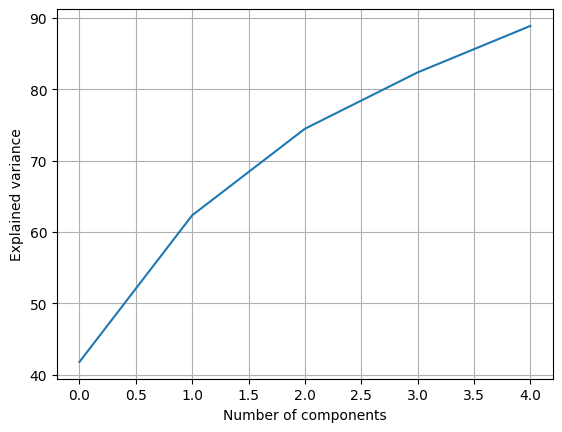

In [92]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [106]:
pca2 = PCA(n_components=6)
pca2.fit(data)

PCA(n_components=6)

In [107]:
np.cumsum(pca2.explained_variance_ratio_ * 100)[-1]

92.06975425952075

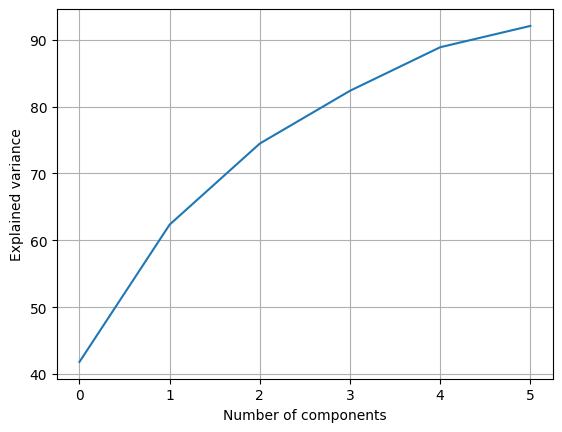

In [108]:
plt.grid()
plt.plot(np.cumsum(pca2.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')